In [19]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator as IDG
import shutil
import warnings
from tensorflow.keras.optimizers import RMSprop,Adam
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

warnings.filterwarnings('ignore')

In [22]:
Train_Data_Dir = "C:/Users/jugal/Desktop/WTF/Datasets 1-2/Training"

Train_Data_Gen = IDG(rescale = 1./255,
                     horizontal_flip=True,
                     rotation_range=30,
                     height_shift_range=0.2,
                     fill_mode='nearest'
                     )

In [23]:
Validation_Data_Dir = "C:/Users/jugal/Desktop/WTF/Datasets 1-2/Validation"
Validation_Data_Gen = IDG(rescale = 1./255)

Train_Gen = Train_Data_Gen.flow_from_directory(Train_Data_Dir,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               batch_size = 64
                                               )

Found 980 images belonging to 2 classes.


In [4]:
Validation_Gen = Validation_Data_Gen.flow_from_directory(Validation_Data_Dir,
                                                         target_size=(224,224),
                                                         class_mode='categorical',
                                                         batch_size= 16
                                                         )

Found 239 images belonging to 2 classes.


In [5]:
Model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [6]:
Model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['acc']
              )

Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         2457984   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 384)        0

In [7]:
History = Model.fit(Train_Gen,
                    steps_per_epoch = 15,
                    epochs = 50,
                    validation_data = Validation_Gen,
                    validation_steps = 15
                    )

Epoch 1/50
15/15 [==============================] - 61s 4s/step - loss: 0.5087 - acc: 0.7172 - val_loss: 0.4393 - val_acc: 0.8117
Epoch 2/50
15/15 [==============================] - 58s 4s/step - loss: 0.3377 - acc: 0.8573 - val_loss: 0.2291 - val_acc: 0.9205
Epoch 3/50
15/15 [==============================] - 57s 4s/step - loss: 0.3131 - acc: 0.8657 - val_loss: 0.3201 - val_acc: 0.8703
Epoch 4/50
15/15 [==============================] - 55s 4s/step - loss: 0.2764 - acc: 0.8930 - val_loss: 0.2183 - val_acc: 0.9372
Epoch 5/50
15/15 [==============================] - 59s 4s/step - loss: 0.2198 - acc: 0.9214 - val_loss: 0.2299 - val_acc: 0.9372
Epoch 6/50
15/15 [==============================] - 64s 4s/step - loss: 0.2533 - acc: 0.9010 - val_loss: 0.2472 - val_acc: 0.9247
Epoch 7/50
15/15 [==============================] - 60s 4s/step - loss: 0.2153 - acc: 0.9225 - val_loss: 0.2172 - val_acc: 0.9331
Epoch 8/50
15/15 [==============================] - 55s 4s/step - loss: 0.2010 - acc: 0.92

In [13]:
acc = History.history['acc']
val_acc = History.history['val_acc']
loss = History.history['loss']
val_loss = History.history['val_loss']

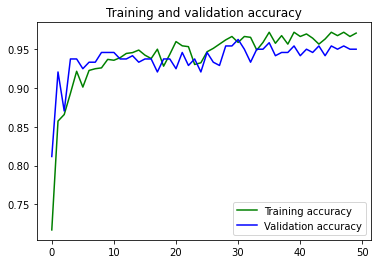

<Figure size 432x288 with 0 Axes>

In [14]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

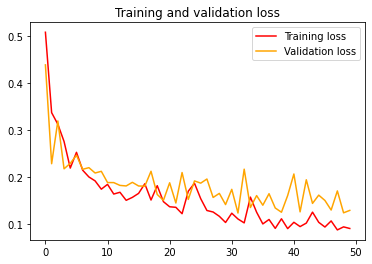

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.tight_layout()
plt.show()

In [17]:
Path = 'C:/Users/jugal/Desktop/WTF/Datasets 1-2/Training/fire/1.jpg'
Img = image.load_img(Path, target_size=(224, 224))
x = image.img_to_array(Img)
x = np.expand_dims(x, axis=0) /255
C = Model.predict(x)
print(np.argmax(C[0])==0, max(C[0]))

True 0.9086466


In [18]:
model_json = Model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
Model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
